# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vienna/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
/Users/vienna/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv("MYAPI.env")




# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



In [3]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en",sort_by="relevancy")
bitcoin_headlines





{'status': 'ok',
 'totalResults': 7910,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Adi Robertson',
   'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
   'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
   'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
   'publishedAt': '2021-03-15T22:25:02Z',
   'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping b

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en",sort_by="relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 2049,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'The climate controversy swirling around NFTs',
   'description': 'Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.',
   'url': 'https://www.theverge.com/2021/3/15/22328203/nft-cryptoart-ethereum-blockchain-climate-change',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkAwb6h1U4BPYMj0=/0x431:6000x3572/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22366636/1230723200.jpg',
   'publishedAt': '2021-03-15T13:51:11Z',
   'content': 'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
Bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()



,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,2021-03-03,,0.0000,0.000,0.000,0.000
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

Ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()



,date,text,compound,positive,negative,neutral
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
2,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
3,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.040472,0.060000,0.046333,0.838167
std,0.478191,0.078122,0.089062,0.237611
min,-0.906200,0.000000,0.000000,0.000000
25%,-0.187500,0.000000,0.000000,0.796750
50%,0.000000,0.021000,0.000000,0.888500
75%,0.355975,0.087500,0.071250,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
Ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.164405,0.070250,0.030750,0.899050
std,0.407550,0.071886,0.046713,0.076916
min,-0.557400,0.000000,0.000000,0.754000
25%,-0.038275,0.000000,0.000000,0.856000
50%,0.160900,0.072000,0.000000,0.916500
75%,0.449150,0.090250,0.064500,0.938250
max,0.831600,0.246000,0.145000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Neither.  Both had exactly the same mean score of 0.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound count score (and the same max score as BTC).

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive count score (and the same max score as BTC).

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
stop_words=stopwords.words('english')

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop_words.append("''")




In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    #clean_text = text.translate(None,punctuation)
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('',text)
    
    
    

   
    # Create a tokenized list of the words
    
    clean_words = word_tokenize(clean_text)
   
    # Convert the words to lowercase
    clean_words = list(filter(lambda w: w.lower(), clean_words))
    
    # Remove the stop words
    clean_words = list(filter(lambda q: q.lower() not in stop_words, clean_words))
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in clean_words]
   
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
Bitcoin_df["tokens"] = Bitcoin_df.text.apply(tokenizer)
Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[One, strictest, crackdown, worldwidePhoto, Mi..."
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, Twitter, hac..."
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, Coinb..."
3,2021-03-03,,0.0000,0.000,0.000,0.000,[]
4,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[TLDR, Enter, Complete, Bitcoin, BTC, Investme..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
Ethereum_df["tokens"] = Ethereum_df.text.apply(tokenizer)
Ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[Famed, auction, house, Christies, sold, first..."
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[One, strictest, crackdown, worldwidePhoto, Mi..."
2,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"[Heres, everything, need, know, nonfungible, t..."
3,2021-03-18,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[OpenSea, one, handful, NFT, marketplace, expl..."
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[NFTs, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
#bigram_counts = Counter(ngrams(processed, n=2))
#print(dict(bigram_counts))

N = 2
n_grams = ngrams(tokenizer(Bitcoin_df.text.str.cat()), N)
Counter(n_grams).most_common(40)

[(('charsBy', 'Reuters'), 6),
 (('Reuters', 'StaffFILE'), 4),
 (('StaffFILE', 'PHOTO'), 4),
 (('virtual', 'currency'), 4),
 (('illustration', 'taken'), 4),
 (('currency', 'Bitcoin'), 3),
 (('taken', 'January'), 3),
 (('January', 'REUTERSDado'), 3),
 (('last', 'year'), 2),
 (('cryptocurrency', 'exchange'), 2),
 (('Investment', 'Giveaway'), 2),
 (('picture', 'illustration'), 2),
 (('PHOTO', 'Representations'), 2),
 (('Representations', 'virtual'), 2),
 (('Bitcoin', 'US'), 2),
 (('banknote', 'seen'), 2),
 (('One', 'strictest'), 1),
 (('strictest', 'crackdown'), 1),
 (('crackdown', 'worldwidePhoto'), 1),
 (('worldwidePhoto', 'Michele'), 1),
 (('Michele', 'Doying'), 1),
 (('Doying', 'VergeIndia'), 1),
 (('VergeIndia', 'reportedly'), 1),
 (('reportedly', 'moving'), 1),
 (('moving', 'forward'), 1),
 (('forward', 'sweeping'), 1),
 (('sweeping', 'ban'), 1),
 (('ban', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'According'), 1),
 (('According', 'Reuters'), 1),
 (('Reuters', 'country'), 1),
 

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

N = 2
n_grams = ngrams(tokenizer(Ethereum_df.text.str.cat()), N)
Counter(n_grams).most_common(40)

[(('nonfungible', 'token'), 3),
 (('charsBy', 'Reuters'), 3),
 (('everything', 'need'), 2),
 (('latest', 'cryptocurrency'), 2),
 (('Kings', 'Leon'), 2),
 (('cryptocurrency', 'platform'), 2),
 (('Investment', 'Giveaway'), 2),
 (('Famed', 'auction'), 1),
 (('auction', 'house'), 1),
 (('house', 'Christies'), 1),
 (('Christies', 'sold'), 1),
 (('sold', 'first'), 1),
 (('first', 'purely'), 1),
 (('purely', 'digital'), 1),
 (('digital', 'piece'), 1),
 (('piece', 'art'), 1),
 (('art', 'whopping'), 1),
 (('whopping', 'million'), 1),
 (('million', 'price'), 1),
 (('price', 'buyer'), 1),
 (('buyer', 'got'), 1),
 (('got', 'digital'), 1),
 (('digital', 'file'), 1),
 (('file', 'collage'), 1),
 (('collage', 'image'), 1),
 (('image', 'complex'), 1),
 (('complex', 'legac'), 1),
 (('legac', 'charsOne'), 1),
 (('charsOne', 'strictest'), 1),
 (('strictest', 'crackdown'), 1),
 (('crackdown', 'worldwidePhoto'), 1),
 (('worldwidePhoto', 'Michele'), 1),
 (('Michele', 'Doying'), 1),
 (('Doying', 'VergeIndia')

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

token_count_btc = tokenizer(Bitcoin_df.text.str.cat())
token_count(token_count_btc,10)

[('Reuters', 10),
 ('Bitcoin', 6),
 ('charsBy', 6),
 ('cryptocurrency', 4),
 ('StaffFILE', 4),
 ('PHOTO', 4),
 ('virtual', 4),
 ('currency', 4),
 ('illustration', 4),
 ('taken', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count_ether = tokenizer(Ethereum_df.text.str.cat())
token_count(token_count_ether,10)

[('Reuters', 8),
 ('new', 8),
 ('cryptocurrency', 6),
 ('week', 5),
 ('digital', 4),
 ('million', 4),
 ('token', 4),
 ('Ethereum', 4),
 ('company', 4),
 ('sold', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

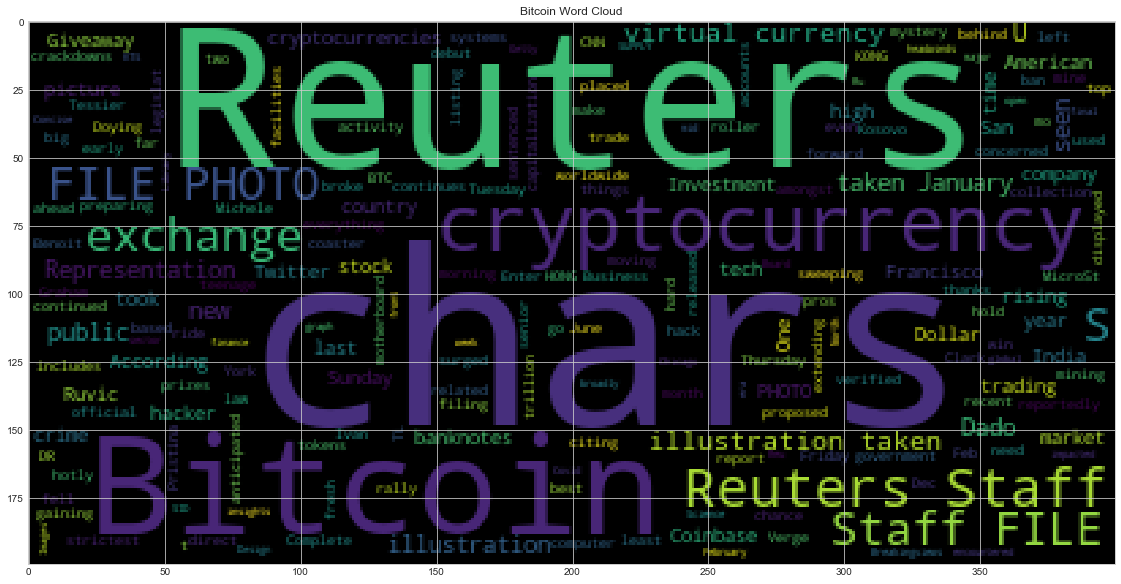

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(Bitcoin_df.text.str.cat())
plt.imshow(wc)
plt.title ("Bitcoin Word Cloud")

Text(0.5, 1.0, 'Ethereum Word Cloud')

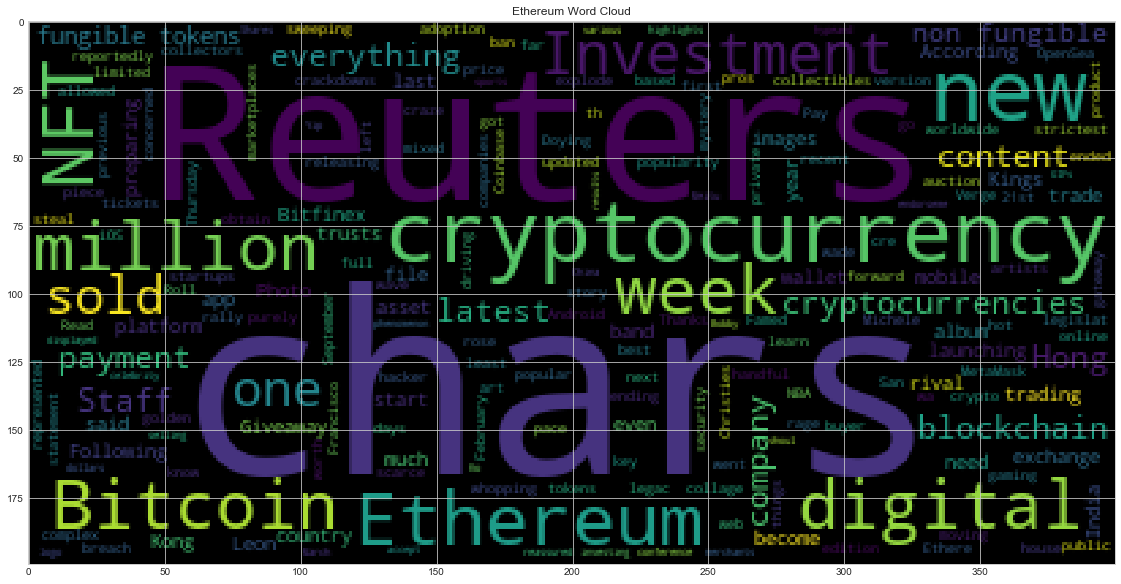

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(Ethereum_df.text.str.cat())
plt.imshow(wc)
plt.title ("Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [24]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
##!python -m spacy download en_core_web_sm


     |████████████████████████████████| 13.7 MB 3.9 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_txt=Bitcoin_df.text.str.cat()
btc_txt

"One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker who broke\r\n into Twitters systems, took over verified accounts, and used t… [+2552 chars]Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars]A proposed law in India would make it a crime to mine, trade, or even hold cryptocurrencies like bitcoin in the country, accor

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_txt)

# Add a title to the document
# YOUR CODE HERE!

doc.user_data["title"] = "Bitcoin NER/NLP Document"







In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text,ent.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
India GPE
Reuters ORG
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Coinbase WORK_OF_ART
American NORP
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
week of February DATE
North American NORP
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
KTS Design/Science Photo Library/Getty Images ORG
The Chicago Board Options Exchange ORG
the US Securities and Exchange Commission ORG
2018 DATE
San 

---

### Ethereum NER

In [39]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ether_txt=Ethereum_df.text.str.cat()
ether_txt

'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new startups have be… [+2529 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for

In [40]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(ether_txt)

# Add a title to the document
# YOUR CODE HERE!

doc.user_data["title"] = "Ethereum NER/NLP Document"

In [41]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')

In [42]:
# List all Entities
# YOUR CODE HERE!

for ent in doc.ents:
    print(ent.text,ent.label_)

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
chars]MetaMask ORG
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
more than a year ago DATE
Ethereum ORG
over $12,000 MONEY
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
India GPE
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 23 DATE
Reuters ORG
as much as 6% PERCENT
Asia LOC
Tuesday DATE
around $52,000 MONEY
Kings ORG
Leon PRODUCT
more than $2 millio

---